<a href="https://colab.research.google.com/github/marlanaswann/spr5-kdm1a-conservation-/blob/main/notebooks/Domain_Annotation_of_SPR_5_and_KDM1A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Setup

In [26]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


##Step 1: Load InterProScan JSONs

In [27]:
# Load SPR-5 JSON
with open("spr5-interproscan-results.json") as f:
    spr5_data = json.load(f)

# Load KDM1A JSON
with open("kdm1a-interproscan-result.json") as f:
    kdm1a_data = json.load(f)

#Verify the JSON Structure
#print(spr5_data.keys())
#print(kdm1a_data)

## Step 2: Function To Extract Domains

In [28]:
def extract_domains(interpro_json, protein_name):
    """
    Extract domain info from InterProScan JSON
    Returns a DataFrame with columns: Protein, Domain, Start, End, Database, Description
    """
    domains = []
    for entry in interpro_json['results']:
        metadata = entry.get('metadata', {})
        domain_name = metadata.get('name', 'NA')
        db = metadata.get('signature_db', 'NA')  # Pfam, InterPro, SMART, etc.
        description = metadata.get('description', 'NA')
        locations = entry.get('locations', [])
        for loc in locations:
            start = loc.get('start', None)
            end = loc.get('end', None)
            domains.append({
                "Protein": protein_name,
                "Domain": domain_name,
                "Start": start,
                "End": end,
                "Database": db,
                "Function/Notes": description
            })
    return pd.DataFrame(domains)

# Extract domains for both proteins
spr5_domains = extract_domains(spr5_data, "SPR-5")
kdm1a_domains = extract_domains(kdm1a_data, "KDM1A")


# Step 3: Combine Into One Table

In [29]:
import json
import pandas as pd

# ---------- UNIFIED DOMAIN NAME MAPPING ----------
unified_map = {
    # SWIRM
    "SWIRM": "SWIRM",
    "SWIRM domain": "SWIRM",
    "SWIRM domain profile": "SWIRM",
    "PROSITE_PROFILES:SWIRM": "SWIRM",

    # Winged-helix / Homeodomain
    "Homeodomain-like": "Winged Helix / Homeodomain-like",
    "WH-like_DNA-bd_sf": "Winged Helix / Homeodomain-like",
    "Winged helix-like DNA-binding domain superfamily": "Winged Helix / Homeodomain-like",

    # Amine Oxidase core
    "Amino_oxidase": "Amine Oxidase (AOD)",
    "Flavin containing amine oxidoreductase": "Amine Oxidase (AOD)",
    "FLAVIN MONOAMINE OXIDASE": "Amine Oxidase (AOD)",
    "FAD-linked reductases, C-terminal domain": "Amine Oxidase (AOD)",
    "FAD/NAD(P)-binding domain": "Amine Oxidase (AOD)",
    "FAD/NAD-bd_sf": "Amine Oxidase (AOD)",

    # Coils
    "Coil": "Coiled-coil",

    # Disorder prediction
    "disorder_prediction": "Disordered region",

    # Signal peptides
    "Signal Peptide": "Signal Peptide",
    "Signal peptide H-region": "Signal Peptide",
    "Signal peptide N-region": "Signal Peptide",
    "Signal peptide C-region": "Signal Peptide",
    "SignalP-noTM": "Signal Peptide",
}

# ---------- FUNCTION TO CLEAN DOMAIN NAMES ----------
def unify_name(name: str):
    for key in unified_map:
        if key.lower() in name.lower():
            return unified_map[key]
    return name  # return unchanged if not in map

# ---------- UNIVERSAL DOMAIN PARSER FOR INTERPROSCAN JSON ----------
def extract_domains_from_json(json_data, protein_name):
    domains = []

    if 'results' in json_data and isinstance(json_data['results'], list):
        for result_entry in json_data['results']:
            if 'matches' in result_entry and isinstance(result_entry['matches'], list):
                for match in result_entry['matches']:
                    signature = match.get('signature', {})
                    locations = match.get('locations', [])

                    raw_domain_name = signature.get('name')
                    if not raw_domain_name and 'entry' in signature and signature['entry'] is not None:
                        raw_domain_name = signature['entry'].get('name')
                    if not raw_domain_name:
                        raw_domain_name = signature.get('accession', 'Unknown Domain')

                    unified_domain_name = unify_name(raw_domain_name)

                    db = signature.get('signatureLibraryRelease', {}).get('library', 'Unknown DB')

                    description = signature.get('description')
                    if not description and 'entry' in signature and signature['entry'] is not None:
                        description = signature['entry'].get('description')
                    if not description:
                        description = raw_domain_name # Fallback to name if no specific description

                    for loc in locations:
                        domains.append({
                            "Protein": protein_name,
                            "Domain": unified_domain_name,
                            "Raw_Name": raw_domain_name,
                            "Start": loc.get('start'),
                            "End": loc.get('end'),
                            "Database": db,
                            "Function/Notes": description
                        })
    return pd.DataFrame(domains)


# ---------- LOAD YOUR JSON FILES ----------
with open("spr5-interproscan-results.json") as f:
    spr_json = json.load(f)

with open("kdm1a-interproscan-result.json") as f:
    kdm_json = json.load(f)

# ---------- EXTRACT DOMAINS ----------
spr5_domains = extract_domains_from_json(spr_json, "SPR-5")
kdm1a_domains = extract_domains_from_json(kdm_json, "KDM1A")

# ---------- COMBINE ----------
all_domains = pd.concat([spr5_domains, kdm1a_domains], ignore_index=True)

# ---------- DISPLAY ----------
display(all_domains)

,Protein,Domain,Raw_Name,Start,End,Database,Function/Notes
0,SPR-5,Winged Helix / Homeodomain-like,Homeodomain-like,26,122,SUPERFAMILY,Homedomain-like superfamily
1,SPR-5,Amine Oxidase (AOD),"FAD-linked reductases, C-terminal domain",513,620,SUPERFAMILY,"FAD-linked reductases, C-terminal domain"
2,SPR-5,Coiled-coil,Coil,304,324,COILS,Coil
3,SPR-5,Coiled-coil,Coil,743,763,COILS,Coil
4,SPR-5,Disordered region,disorder_prediction,718,739,MOBIDB_LITE,consensus disorder prediction
5,SPR-5,Amine Oxidase (AOD),FAD/NAD-bd_sf,623,681,GENE3D,FAD/NAD(P)-binding domain superfamily
6,SPR-5,Winged Helix / Homeodomain-like,WH-like_DNA-bd_sf,26,128,GENE3D,Winged helix-like DNA-binding domain superfamily
7,SPR-5,Amine Oxidase (AOD),FLAVIN MONOAMINE OXIDASE,61,680,PANTHER,Flavin monoamine oxidase and related enzymes
8,SPR-5,SWIRM,SWIRM,40,117,PFAM,SWIRM domain
9,SPR-5,Amine Oxidase (AOD),FAD/NAD-bd_sf,130,223,GENE3D,FAD/NAD(P)-binding domain superfamily


### Step 4: Plotting Protein Domains with Shared Domain Highlight

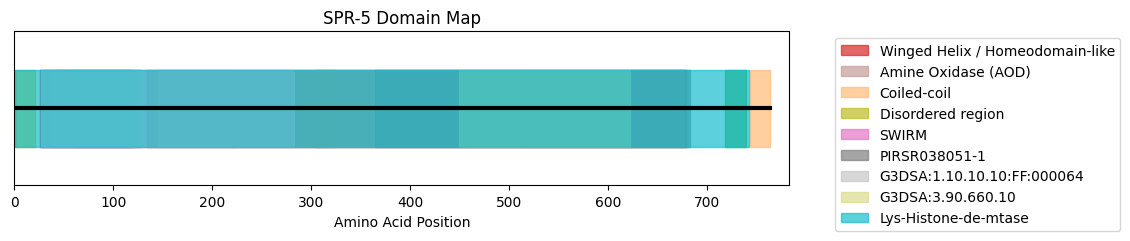

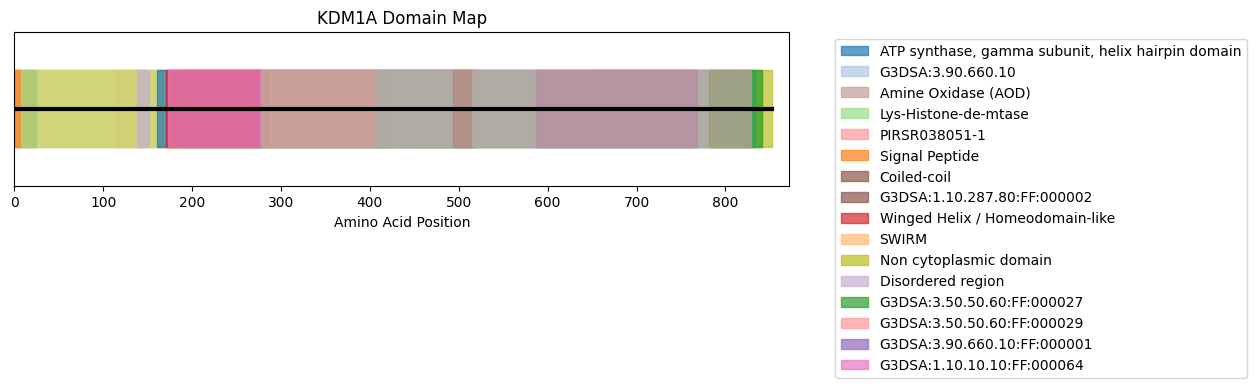

In [30]:
def plot_protein_domains(df, protein_name):
    """
    Draw a linear diagram of protein with domains
    """
    prot_df = df[df['Protein'] == protein_name]
    prot_length = prot_df['End'].max()  # Approximate protein length
    fig, ax = plt.subplots(figsize=(10, 2))

    # Draw protein backbone
    ax.plot([0, prot_length], [0, 0], color='black', linewidth=3)

    colors = plt.cm.tab20.colors
    for i, (_, row) in enumerate(prot_df.iterrows()):
        ax.add_patch(
            mpatches.Rectangle(
                (row['Start'], -0.5),
                row['End'] - row['Start'],
                1,
                color=colors[i % len(colors)],
                alpha=0.7,
                label=row['Domain']
            )
        )

    ax.set_xlim(0, prot_length + 20)
    ax.set_ylim(-1, 1)
    ax.set_yticks([])
    ax.set_xlabel("Amino Acid Position")
    ax.set_title(protein_name + " Domain Map")
    # Add legend outside plot
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

# Plot both proteins
plot_protein_domains(all_domains, "SPR-5")
plot_protein_domains(all_domains, "KDM1A")



### Step 5: Visualization of Shared Domains by Count

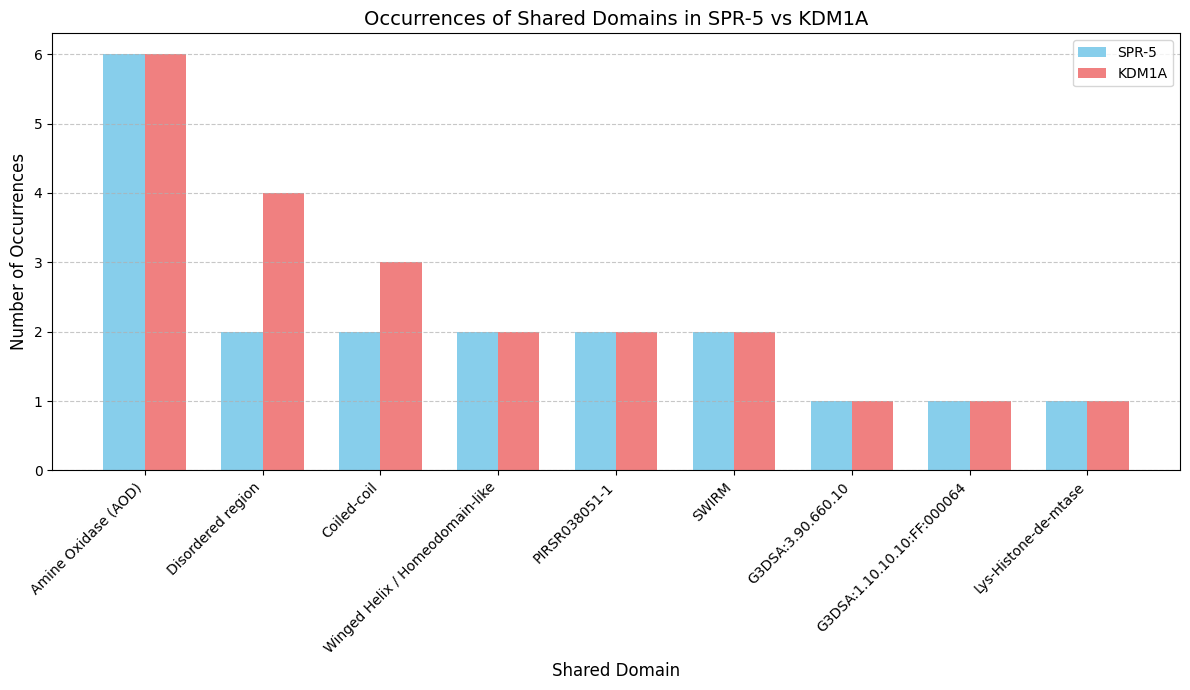

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Ensure shared_domains_df is available from previous steps
# If not, the code from cell 8bff5ade needs to be re-run or this block needs to be run after it.

if 'shared_domains_df' not in locals():
    print("shared_domains_df not found. Please ensure the previous cell (8bff5ade) has been executed.")
else:
    # Sort the DataFrame for better visualization
    df_plot = shared_domains_df.set_index('Shared Domain').sort_values(by=['Count_SPR-5', 'Count_KDM1A'], ascending=False)

    # Plotting
    fig, ax = plt.subplots(figsize=(12, 7))

    bar_width = 0.35
    index = np.arange(len(df_plot))

    bar1 = ax.bar(index, df_plot['Count_SPR-5'], bar_width, label='SPR-5', color='skyblue')
    bar2 = ax.bar(index + bar_width, df_plot['Count_KDM1A'], bar_width, label='KDM1A', color='lightcoral')

    ax.set_xlabel('Shared Domain', fontsize=12)
    ax.set_ylabel('Number of Occurrences', fontsize=12)
    ax.set_title('Occurrences of Shared Domains in SPR-5 vs KDM1A', fontsize=14)
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(df_plot.index, rotation=45, ha='right', fontsize=10)
    ax.legend()
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

### Step 6: Dynamic Heatmap Visualization of Domain Occurrences

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure domain_counts DataFrame is available from previous steps
# If not, the code from the cell comparing domain occurrences (8bff5ade) needs to be re-run.

if 'domain_counts' not in locals():
    print("domain_counts not found. Please ensure the previous cell (8bff5ade) has been executed to generate the domain comparison table.")
else:
    # Prepare data for heatmap: sort for better visualization
    # We'll re-index to make sure all domains are covered, and fill NaNs with 0
    heatmap_data = domain_counts.copy()

    # Create the heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        heatmap_data,
        annot=True,     # Show the numerical values on the heatmap
        fmt="g",        # Format annotations as general number
        cmap="viridis", # Choose a visually appealing colormap
        linewidths=.5,  # Add lines between cells
        linecolor='black', # Color of the lines between cells
        cbar_kws={'label': 'Number of Occurrences'} # Label for the color bar
    )

    plt.title('Domain Occurrence Heatmap: SPR-5 vs KDM1A', fontsize=16)
    plt.xlabel('Protein', fontsize=12)
    plt.ylabel('Domain', fontsize=12)
    plt.xticks(rotation=45, ha='right') # Rotate protein labels
    plt.yticks(rotation=0) # Ensure domain labels are horizontal
    plt.tight_layout()
    plt.show()

domain_counts not found. Please ensure the previous cell (8bff5ade) has been executed to generate the domain comparison table.


### Step 7: Compare Domain Occurrences between SPR-5 and KDM1A

In [36]:
shared_domains_summary = []

# Ensure 'Shared' column is calculated (if not already by previous cells)
# This code assumes 'shared_unified_domains' is already defined from cell abf54af3
if 'Shared' not in all_domains.columns:
    spr5_unique_unified_domains = set(all_domains[all_domains['Protein'] == 'SPR-5']['Domain'])
    kdm1a_unique_unified_domains = set(all_domains[all_domains['Protein'] == 'KDM1A']['Domain'])
    shared_unified_domains = spr5_unique_unified_domains.intersection(kdm1a_unique_unified_domains)
    all_domains['Shared'] = all_domains['Domain'].apply(lambda x: "Yes" if x in shared_unified_domains else "No")

for domain_name in shared_unified_domains:
    spr5_occurrences = all_domains[(all_domains['Protein'] == 'SPR-5') & (all_domains['Domain'] == domain_name)]
    kdm1a_occurrences = all_domains[(all_domains['Protein'] == 'KDM1A') & (all_domains['Domain'] == domain_name)]

    count_spr5 = len(spr5_occurrences)
    count_kdm1a = len(kdm1a_occurrences)

    spr5_ranges = [f"[{s}-{e}]" for s, e in zip(spr5_occurrences['Start'], spr5_occurrences['End'])]
    kdm1a_ranges = [f"[{s}-{e}]" for s, e in zip(kdm1a_occurrences['Start'], kdm1a_occurrences['End'])]

    shared_domains_summary.append({
        "Shared Domain": domain_name,
        "Count_SPR-5": count_spr5,
        "SPR-5_Ranges": ", ".join(spr5_ranges) if spr5_ranges else "None",
        "Count_KDM1A": count_kdm1a,
        "KDM1A_Ranges": ", ".join(kdm1a_ranges) if kdm1a_ranges else "None"
    })

shared_domains_df = pd.DataFrame(shared_domains_summary)

# --- Create domain_counts DataFrame for Heatmap Visualization ---
# This groups all domains by protein and counts their occurrences
domain_counts = all_domains.groupby(['Domain', 'Protein']).size().unstack(fill_value=0)
domain_counts.columns.name = None # Remove the 'Protein' level from columns

# Rename columns for consistency with shared_domains_df (Count_SPR-5, Count_KDM1A)
domain_counts = domain_counts.rename(columns={'SPR-5': 'Count_SPR-5', 'KDM1A': 'Count_KDM1A'})


display(shared_domains_df.sort_values(by="Shared Domain"))

,Shared Domain,Count_SPR-5,SPR-5_Ranges,Count_KDM1A,KDM1A_Ranges
2,Amine Oxidase (AOD),6,"[513-620], [623-681], [61-680], [130-223], [13...",6,"[655-763], [782-841], [278-409], [190-833], [2..."
7,Coiled-coil,2,"[304-324], [743-763]",3,"[434-468], [113-148], [494-514]"
3,Disordered region,2,"[718-739], [1-21]",4,"[1-176], [160-172], [7-25], [138-151]"
4,G3DSA:1.10.10.10:FF:000064,1,[27-128],1,[173-276]
0,G3DSA:3.90.660.10,1,[449-622],1,[587-768]
6,Lys-Histone-de-mtase,1,[1-742],1,[24-839]
5,PIRSR038051-1,2,"[27-283], [364-683]",2,"[173-422], [446-832]"
8,SWIRM,2,"[40-117], [28-126]",2,"[184-264], [174-273]"
1,Winged Helix / Homeodomain-like,2,"[26-122], [26-128]",2,"[172-277], [171-277]"


In [34]:
print('Summary Statistics for Numerical Columns:')
display(all_domains.describe())

print('\nValue Counts for Categorical Columns:')
for col in ['Protein', 'Domain', 'Database', 'Function/Notes']:
    if col in all_domains.columns:
        print(f'\n--- {col} ---')
        display(all_domains[col].value_counts().head(10)) # Display top 10 for brevity

Summary Statistics for Numerical Columns:


,Start,End
count,52.000000,52.000000
mean,246.057692,437.307692
std,240.848371,297.250508
min,1.000000,6.000000
25%,26.750000,150.250000
50%,172.500000,415.500000
75%,416.000000,739.750000
max,782.000000,852.000000



Value Counts for Categorical Columns:

--- Protein ---


,count
Protein,
KDM1A,33
SPR-5,19



--- Domain ---


,count
Domain,
Amine Oxidase (AOD),12
Disordered region,6
Coiled-coil,5
Signal Peptide,5
SWIRM,4
PIRSR038051-1,4
Winged Helix / Homeodomain-like,4
G3DSA:1.10.10.10:FF:000064,2
G3DSA:3.90.660.10,2



--- Database ---


,count
Database,
GENE3D,9
SUPERFAMILY,6
MOBIDB_LITE,6
FUNFAM,6
COILS,5
PHOBIUS,5
PFAM,4
PIRSR,4
PROSITE_PROFILES,2



--- Function/Notes ---


,count
Function/Notes,
FAD/NAD(P)-binding domain superfamily,6
consensus disorder prediction,6
Coil,5
Lysine-specific histone demethylase,5
PIRSR038051-1,4
Lysine-specific histone demethylase 1A,3
Homedomain-like superfamily,2
"FAD-linked reductases, C-terminal domain",2
Winged helix-like DNA-binding domain superfamily,2
